# Malaria Cell CNN Classifier

The data of this project comes from Kaggle.com(https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria).

With data of Malaria Cell, we can build a CNN model and train the model with image given to tell whether a cell is infected or not.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.preprocessing import image
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
from keras.layers import Dense, Conv2D, MaxPooling2D,Dropout,BatchNormalization,Flatten

Using TensorFlow backend.


First we load images in two folders.

In [2]:
parapath = "data/Parasitized/"
uninpath = 'data/Uninfected/'
parastized = os.listdir(parapath)
uninfected = os.listdir(uninpath)

Load all the image the path collected in prastized and uninfected list. In Windows there is a image thumbnail cache "Thumb.db" so we dont load that in our list.

Change them into arrays and save in list of data.To make a target array we set up a label list with 1 to a parastized cell and 0 to an uninfected one.

In [3]:
data = []
label = []
for para in parastized:
    try:
        img =  image.load_img(parapath+para,target_size=(128,128))
        x = image.img_to_array(img)
        data.append(x)
        label.append(1)
    except:
        print("Can't add "+para+" in the dataset")
for unin in uninfected:
    try:
        img =  image.load_img(uninpath+unin,target_size=(128,128))
        data.append(x)
        label.append(0)
    except:
        print("Can't add "+unin+" in the dataset")  

Can't add Thumbs.db in the dataset
Can't add Thumbs.db in the dataset


Change list data to array in Numpy. Note that the variable data now has a memory of 5 GB. 

I tried to use (224,224,3)rather than (128,128,3) as input of VGG-16, but found variable data will have a size of 15GB and raise a MemoryError.

In [4]:
data = np.array(data)
label = np.array(label)

In [5]:
print(sys.getsizeof(data))
print(data.shape)

5418123408
(27558, 128, 128, 3)


Now we normlize the data matrix, the range of a PGB pixel is (0,255) so divide by 255 is OK to let values in range of (0,1).

Shuffle and Split data to train and test with sklearn.model_selection.train_test_split()

In [6]:
data = data/255
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.1,random_state=0)

Keras is a powerful python library to set up neural network models. The model set is similiar to VGG with fewer parameters and layers. 

In [7]:
def MalariaModel():
    model = Sequential()
    model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'a11', input_shape = (128, 128, 3)))  
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'a12'))
    model.add(BatchNormalization(name = 'a13'))
    #input = (128,128,4)
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'a21'))   
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'a22'))
    model.add(BatchNormalization(name = 'a23'))
    #input = (64,64,8)
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'a31'))   
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'a32'))
    model.add(BatchNormalization(name = 'a33'))
    #input = (32,32,16)
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', name = 'fc1'))
    model.add(Dense(1, activation = 'sigmoid', name = 'prediction'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

The model has 1M parameters, a big number for a binary classficiation. We can reduce paramters while keep the performance of a model if possible.

In [8]:
modelone = MalariaModel()
modelone.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
a11 (Conv2D)                 (None, 128, 128, 4)       112       
_________________________________________________________________
a12 (MaxPooling2D)           (None, 64, 64, 4)         0         
_________________________________________________________________
a13 (BatchNormalization)     (None, 64, 64, 4)         16        
_________________________________________________________________
a21 (Conv2D)                 (None, 64, 64, 8)         296       
_________________________________________________________________
a22 (MaxPooling2D)           (None, 32, 32, 8)         0         
_________________________________________________________________
a23 (BatchNormalization)     (None, 32, 32, 8)         32        
_________________________________________________________________
a31 

Train the model with training set. 

The model fits training data just in one epoch and I found any additional epochs will make prediction overfit and become a random guess.

In [9]:
output = modelone.fit(x_train, y_train,epochs=1, batch_size=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
24802/24802 [==============================] - 153s 6ms/step - loss: 0.2297 - acc: 0.9581


The model receives an accuracy of 100% on test set.

In [10]:
preds = modelone.evaluate(x = x_test,y = y_test)
print("Test Accuracy : %.2f%%" % (preds[1]*100))

2756/2756 [==============================] - 8s 3ms/step
Test Accuracy : 100.00%


In [11]:
modelone.save('malariaCNNModel.h5')

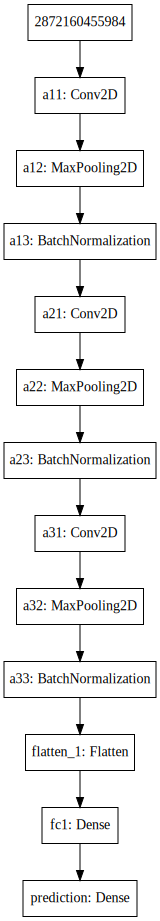

In [12]:
modelpic = plot_model(modelone, to_file='model.png')
SVG(model_to_dot(modelone).create(prog='dot', format='svg'))